<a href="https://colab.research.google.com/github/vamvieira/Aulas_Senai/blob/main/Decision_tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# Pacotes de manipulacao de dados
import pandas as pd
import numpy as np
# Pacotes Graficos
import matplotlib.pyplot as plt
import seaborn as sns
#pacotes de modelagem
import statsmodels.api as sm

#pacotes de modelagem estatísticas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [58]:
df = pd.read_csv('base_bom_pagador.csv')
df.head()

,Bom_Pagador,Renda_Mensal,Idade,Estado_Civil,Possui_Cartao_Credito,Escolaridade,Tempo_Emprego,Qtd_Filhos,Score_Credito,Historico_Inadimplencia,Utiliza_Limite_Cartao,Valor_Emprestimos,Tipo_Residencia,Trabalha_Formalmente
0,Sim,1688,21,Solteiro,Não,Pós-graduação,0,5,429,Nunca,97,40613,Financiada,Sim
1,Sim,12645,32,Viúvo,Não,Pós-graduação,19,4,580,Nunca,69,44769,Própria,Sim
2,Sim,13308,22,Solteiro,Não,Fundamental,4,2,346,Nunca,48,15783,Alugada,Sim
3,Sim,3376,20,Solteiro,Sim,Médio,7,2,355,Nunca,58,32615,Financiada,Sim
4,Não,12669,39,Divorciado,Não,Fundamental,4,1,866,Nunca,41,38217,Alugada,Sim


In [59]:
df.Historico_Inadimplencia.unique()

array(['Nunca', '2 ou mais', '1 vez'], dtype=object)

In [60]:
y = df['Bom_Pagador'].map({'Sim': 1, 'Não':0})
x = df.drop('Bom_Pagador', axis=1)

In [61]:
#Transformando variáveis categoricas em dummies
X_dummies = pd.get_dummies(x , drop_first=True)

In [62]:
#Dividindo a base entre Treino/Teste
x_train, x_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=42)

In [63]:
x_test

,Renda_Mensal,Idade,Tempo_Emprego,Qtd_Filhos,Score_Credito,Utiliza_Limite_Cartao,Valor_Emprestimos,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Estado_Civil_Viúvo,Possui_Cartao_Credito_Sim,Escolaridade_Médio,Escolaridade_Pós-graduação,Escolaridade_Superior,Historico_Inadimplencia_2 ou mais,Historico_Inadimplencia_Nunca,Tipo_Residencia_Financiada,Tipo_Residencia_Própria,Trabalha_Formalmente_Sim
83,9979,27,22,3,977,7,21411,False,True,False,False,True,False,False,False,False,True,False,True
53,13491,46,21,5,924,48,32553,False,True,False,True,False,False,False,False,True,False,True,True
70,4970,42,0,1,908,55,6367,False,True,False,False,True,False,False,True,False,False,True,True
45,14718,46,26,0,753,79,17988,False,False,True,False,False,False,False,False,False,True,False,True
44,7447,52,22,3,761,43,25939,True,False,False,False,True,False,False,True,False,True,False,False
39,11313,39,30,5,910,19,19390,False,False,True,False,False,False,True,False,True,False,True,True
22,4427,24,3,2,366,19,38507,False,False,False,False,False,True,False,False,True,False,True,True
80,12147,60,28,1,570,3,8612,False,False,True,False,False,False,False,False,True,True,False,True
10,7073,49,6,4,312,29,30118,True,False,False,True,True,False,False,False,False,False,False,True
0,1688,21,0,5,429,97,40613,False,True,False,False,False,True,False,False,True,True,False,True


In [64]:
x_train

,Renda_Mensal,Idade,Tempo_Emprego,Qtd_Filhos,Score_Credito,Utiliza_Limite_Cartao,Valor_Emprestimos,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Estado_Civil_Viúvo,Possui_Cartao_Credito_Sim,Escolaridade_Médio,Escolaridade_Pós-graduação,Escolaridade_Superior,Historico_Inadimplencia_2 ou mais,Historico_Inadimplencia_Nunca,Tipo_Residencia_Financiada,Tipo_Residencia_Própria,Trabalha_Formalmente_Sim
55,14869,24,25,2,512,80,15081,False,False,False,True,False,True,False,False,True,False,True,True
88,2549,55,16,4,530,18,8661,False,False,False,True,True,False,False,False,True,True,False,True
26,6389,40,30,5,890,64,45240,False,False,True,False,False,False,False,False,True,False,True,True
42,1819,30,2,5,835,100,1437,False,False,True,False,True,False,False,False,True,False,True,True
69,8432,28,10,2,761,11,41172,False,True,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,3560,23,1,3,383,4,12460,False,False,False,False,False,False,True,False,True,False,False,True
71,10335,18,27,0,781,12,41121,False,False,True,True,False,False,False,False,False,True,False,True
14,4091,64,24,2,790,40,30490,True,False,False,True,False,False,True,True,False,False,True,True
92,10575,65,19,2,445,72,32885,False,False,True,True,False,True,False,False,False,False,True,True


In [65]:
#Ajuste do Modelo
modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [66]:
acuracia = modelo.score(x_test, y_test)
print(f"Acurácia:{acuracia:.2%}")

Acurácia:65.00%


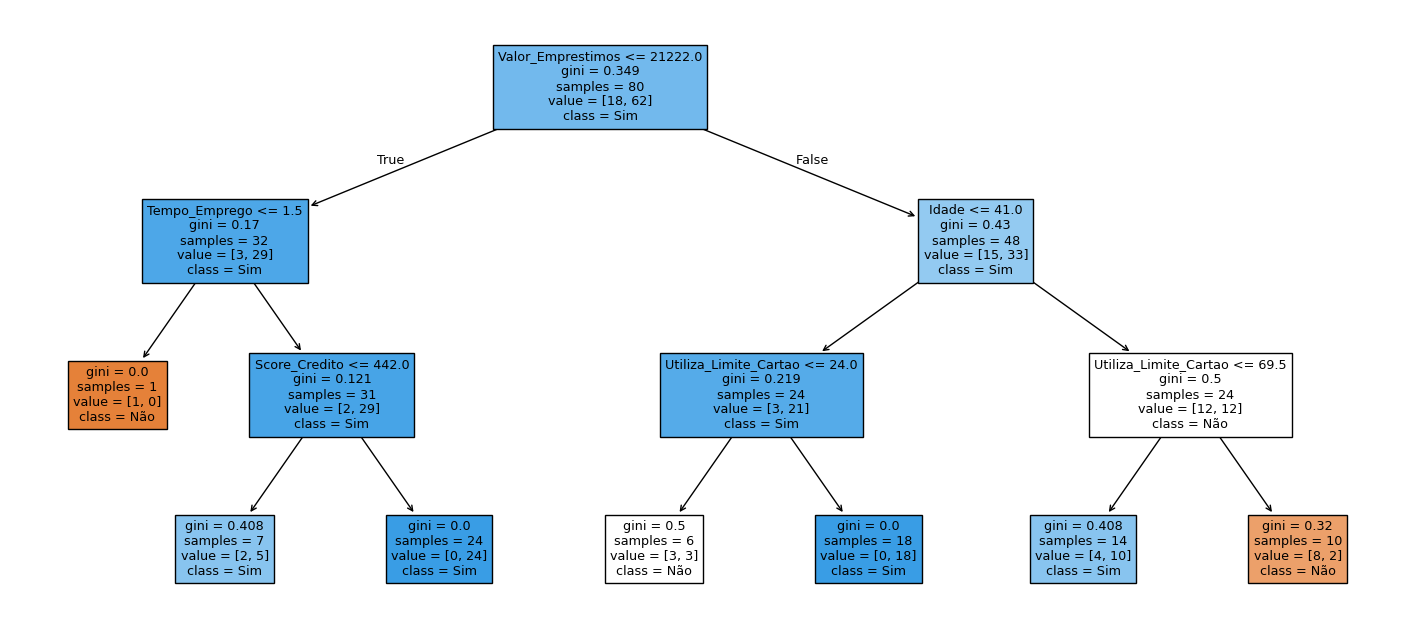

In [67]:
plt.figure(figsize=(18,8))
plot_tree(modelo,
          feature_names=X_dummies.columns,
          class_names=['Não', 'Sim'],
          filled=True)
plt.show()

In [68]:
y_pred = modelo.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [69]:
print('Acurácia: ', accuracy_score(y_test, y_pred))
print('Relatório de Classificação:\n', classification_report(y_test, y_pred))

Acurácia:  0.65
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.67      0.83      0.74        12

    accuracy                           0.65        20
   macro avg       0.63      0.60      0.60        20
weighted avg       0.64      0.65      0.63        20

